In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")

In [64]:
#reading csvs from cleaned data set
cleaned_pop_df = pd.read_csv("CleanedData/cleaned_population.csv")
cleaned_rental_df = pd.read_csv("CleanedData/cleaned_rental.csv")

housing2018_df = pd.read_csv("CleanedData/cleaned_housing2018.csv")
housing2019_df = pd.read_csv("CleanedData/cleaned_housing2019.csv")
housing2020_df = pd.read_csv("CleanedData/cleaned_housing2020.csv")

#data set with changing rates
population_df = pd.read_csv("CsvFiles/sorted_population_final.csv")
# rental_df = pd.read_csv("rental_rate.csv")

#all house price csv 
house_df = pd.read_csv("RawData/HomePriceFull.csv")

## Analysis Calculations for yearly changes in housing market for all cities 

In [37]:
#calculating yearly average of the house price in 2018
housing2018_df["Yearly Average"] = housing2018_df.mean(axis=1)

#rearranging the columns 
order = ['City', 'State', 'Yearly Average', '1/31/18', '2/28/18', '3/31/18', '4/30/18', '5/31/18',
       '6/30/18', '7/31/18', '8/31/18', '9/30/18', '10/31/18', '11/30/18', '12/31/18']
housing2018_df = housing2018_df[order]


In [38]:
#calculating the yearly average house price in 2019
housing2019_df["Yearly Average"]=housing2019_df.mean(axis=1)

#rearranging the columns 
order = ['City', 'State', 'Yearly Average', '1/31/19', '2/28/19', '3/31/19', '4/30/19', '5/31/19',
       '6/30/19', '7/31/19', '8/31/19', '9/30/19', '10/31/19', '11/30/19', '12/31/19']

housing2019_df = housing2019_df[order]

In [39]:
#calculating the yearly average house price in 2020
housing2020_df["Yearly Average"]=housing2020_df.mean(axis=1)

#rearranging the columns 
order = ['City', 'State', 'Yearly Average','1/31/20', '2/29/20', '3/31/20', '4/30/20', '5/31/20',
       '6/30/20', '7/31/20', '8/31/20', '9/30/20']
housing2020_df = housing2020_df[order]

In [41]:
#calculating yearly changes 
City = housing2018_df["City"]
State = housing2018_df["State"]
Average2018 = housing2018_df['Yearly Average']
Average2019 = housing2019_df['Yearly Average']
Average2020 = housing2020_df['Yearly Average']

#combining the yearly changes in house price into one dataframe
summary_df = pd.DataFrame({"City":City,"State":State,
                          "Average2018" : Average2018,
                          "Average2019" : Average2019,
                           "Average2020": Average2020})

summary_df["2018-2019 changing rate"]=''
summary_df["2019-2020 changing rate"]=''


for row in summary_df:
    rate_18 = ((summary_df['Average2019']- summary_df['Average2018'])/summary_df['Average2019'])*100
    summary_df['2018-2019 changing rate'] = rate_18
    
    rate_19 = ((summary_df['Average2020']- summary_df['Average2019'])/summary_df['Average2020'])*100
    summary_df['2019-2020 changing rate'] = rate_19

#calculating overall changing rate differences in 2018-2020
summary_df["Diff in 2018-2020 changing rate"]=summary_df["2019-2020 changing rate"]-summary_df["2018-2019 changing rate"]

#exporting the dataframe to csv file 
summary_df.to_csv("CsvFiles/housing_rate.csv")


## Top and Bottom Cities from Population Analysis for Housing Market Analysis

In [65]:
#Reading from housing_rate file created above 
housing_df = pd.read_csv("CsvFiles/housing_rate.csv")

In [71]:
#finding the bottom 20 cities from the dataframe
df1 = housing_df.loc[(housing_df["City"]=="Columbus") & (housing_df["State"]=="GA")]
df2 = housing_df.loc[(housing_df["City"]=="Midland") & (housing_df["State"]=="TX")]
df3 = housing_df.loc[(housing_df["City"]=="Fayetteville") & (housing_df["State"]=="NC")]
df4 = housing_df.loc[(housing_df["City"]=="Tempe") & (housing_df["State"]=="AZ")]
df5 = housing_df.loc[(housing_df["City"]=="Surprise") & (housing_df["State"]=="AZ")]
df6 = housing_df.loc[(housing_df["City"]=="Fremont") & (housing_df["State"]=="CA")]
df7 = housing_df.loc[(housing_df["City"]=="Moreno Valley") & (housing_df["State"]=="CA")]
df8 = housing_df.loc[(housing_df["City"]=="North Las Vegas") & (housing_df["State"]=="NV")]
df9 = housing_df.loc[(housing_df["City"]=="Denton") & (housing_df["State"]=="TX")]
df10 = housing_df.loc[(housing_df["City"]=="Indianapolis") & (housing_df["State"]=="IN")]
df11 = housing_df.loc[(housing_df["City"]=="Omaha") & (housing_df["State"]=="NE")]
df12 = housing_df.loc[(housing_df["City"]=="Pittsburgh") & (housing_df["State"]=="PA")]
df13 = housing_df.loc[(housing_df["City"]=="Newport News") & (housing_df["State"]=="VA")]
df14 = housing_df.loc[(housing_df["City"]=="Ontario") & (housing_df["State"]=="CA")]
df15 = housing_df.loc[(housing_df["City"]=="Tulsa") & (housing_df["State"]=="OK")]
df16 = housing_df.loc[(housing_df["City"]=="Port Saint Lucie") & (housing_df["State"]=="FL")]
df17 = housing_df.loc[(housing_df["City"]=="Saint Louis") & (housing_df["State"]=="MO")]
df18 = housing_df.loc[(housing_df["City"]=="Oklahoma City") & (housing_df["State"]=="OK")]
df19 = housing_df.loc[(housing_df["City"]=="Murfreesboro") & (housing_df["State"]=="TN")]
df20 = housing_df.loc[(housing_df["City"]=="Yonkers") & (housing_df["State"]=="NY")]


In [72]:
#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19,df20]
bottom_df = pd.concat(frames).reset_index(drop=True)

#exporting the dataframe to csv
bottom_df.to_csv("CsvFiles/FinalBottom20.csv")
bottom_df

,Unnamed: 0,City,State,Average2018,Average2019,Average2020,2018-2019 changing rate,2019-2020 changing rate,Diff in 2018-2020 changing rate
0,169,Columbus,GA,9.170492e+04,9.595038e+04,98472.7,4.424643,2.561436,-1.863206
1,204,Midland,TX,2.249067e+05,2.499335e+05,238692.4,10.013373,-4.709434,-14.722807
2,103,Fayetteville,NC,1.093679e+05,1.144015e+05,116637.9,4.399954,1.917354,-2.482600
3,174,Tempe,AZ,2.545154e+05,2.693622e+05,285429.3,5.511851,5.629089,0.117237
4,268,Surprise,AZ,2.315862e+05,2.448392e+05,257194.4,5.412910,4.803855,-0.609055
5,114,Fremont,CA,1.017982e+06,1.006844e+06,976517.9,-1.106252,-3.105487,-1.999235
6,141,Moreno Valley,CA,3.005975e+05,3.140104e+05,320670.6,4.271466,2.076965,-2.194501
7,113,North Las Vegas,NV,2.302898e+05,2.457884e+05,246499.0,6.305674,0.288283,-6.017391
8,276,Denton,TX,2.223987e+05,2.302643e+05,230999.9,3.415907,0.318438,-3.097469
9,13,Indianapolis,IN,1.275192e+05,1.381049e+05,143402.1,7.665019,3.693933,-3.971087


In [73]:
#finding the top 20 cities from the dataframe
df1 = housing_df.loc[(housing_df["City"]=="Salt Lake City") & (housing_df["State"]=="UT")]
df2 = housing_df.loc[(housing_df["City"]=="Hialeah") & (housing_df["State"]=="FL")]
df3 = housing_df.loc[(housing_df["City"]=="Jersey City") & (housing_df["State"]=="NJ")]
df4 = housing_df.loc[(housing_df["City"]=="Irvine") & (housing_df["State"]=="CA")]
df5 = housing_df.loc[(housing_df["City"]=="Alexandria") & (housing_df["State"]=="VA")]
df6 = housing_df.loc[(housing_df["City"]=="Bellevue") & (housing_df["State"]=="WA")]
df7 = housing_df.loc[(housing_df["City"]=="Garland") & (housing_df["State"]=="TX")]
df8 = housing_df.loc[(housing_df["City"]=="Glendale") & (housing_df["State"]=="CA")]
df9 = housing_df.loc[(housing_df["City"]=="Clarksville") & (housing_df["State"]=="TN")]
df10 = housing_df.loc[(housing_df["City"]=="Tampa") & (housing_df["State"]=="FL")]
df11 = housing_df.loc[(housing_df["City"]=="Miami") & (housing_df["State"]=="FL")]
df12 = housing_df.loc[(housing_df["City"]=="Dallas") & (housing_df["State"]=="TX")]
df13 = housing_df.loc[(housing_df["City"]=="Des Moines") & (housing_df["State"]=="IA")]
df14 = housing_df.loc[(housing_df["City"]=="Waco") & (housing_df["State"]=="TX")]
df15 = housing_df.loc[(housing_df["City"]=="Seattle") & (housing_df["State"]=="WA")]
df16 = housing_df.loc[(housing_df["City"]=="Boston") & (housing_df["State"]=="MA")]
df17 = housing_df.loc[(housing_df["City"]=="Irving") & (housing_df["State"]=="TX")]
df18 = housing_df.loc[(housing_df["City"]=="Salem") & (housing_df["State"]=="OR")]
df19 = housing_df.loc[(housing_df["City"]=="Eugene") & (housing_df["State"]=="OR")]
df20 = housing_df.loc[(housing_df["City"]=="Saint Petersburg") & (housing_df["State"]=="FL")]


In [74]:
#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19,df20]
top_df = pd.concat(frames).reset_index(drop=True)

#exporting the dataframe to csv
top_df.to_csv("CsvFiles/FinalTop20.csv")
top_df

,Unnamed: 0,City,State,Average2018,Average2019,Average2020,2018-2019 changing rate,2019-2020 changing rate,Diff in 2018-2020 changing rate
0,149,Salt Lake City,UT,343422.230769,372636.000000,384241.3,7.839760,3.020316,-4.819445
1,92,Hialeah,FL,253026.230769,265117.384615,266368.7,4.560679,0.469768,-4.090911
2,89,Jersey City,NJ,470107.076923,475416.153846,476522.3,1.116722,0.232129,-0.884593
3,105,Irvine,CA,825541.153846,826222.538462,813541.2,0.082470,-1.558783,-1.641252
4,207,Alexandria,VA,463638.307692,483195.230769,497195.9,4.047416,2.815926,-1.231490
5,247,Bellevue,WA,852965.923077,830981.846154,858318.7,-2.645554,3.184930,5.830485
6,110,Garland,TX,179058.000000,190811.846154,190723.3,6.159914,-0.046427,-6.206341
7,139,Glendale,CA,757527.230769,768068.538462,786395.4,1.372444,2.330489,0.958046
8,185,Clarksville,TN,165156.076923,172943.461538,180537.5,4.502850,4.206350,-0.296500
9,55,Tampa,FL,213695.307692,225127.230769,232594.9,5.077983,3.210590,-1.867393


In [75]:
#combining city name and state for top 20 
top_df['City, State']= ''
city_state = top_df['City'].map(str)+', ' + top_df['State'].map(str)
top_df['City, State'] = city_state

#combining city name and state for bottom 20 
bottom_df['City, State']= ''
city_state = bottom_df['City'].map(str)+', ' + bottom_df['State'].map(str)
bottom_df['City, State'] = city_state

In [76]:
#creating new dataframe of top and bottom for plotting 
pull_columns = ['City, State','2018-2019 changing rate','2019-2020 changing rate']
new_top = top_df[pull_columns]
new_bottom = bottom_df[pull_columns]

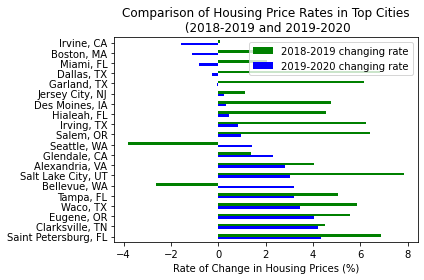

In [77]:
#plotting horizontal bar graph to compare Housing Price Rates in Top Cities (2018-2019 and 2019-2020)
new_top = new_top.sort_values(by='2019-2020 changing rate')
ax = new_top.plot.barh(color=["green","blue"], rot=0)
ax.set_title("Comparison of Housing Price Rates in Top Cities\n (2018-2019 and 2019-2020")
ax.set_xlabel("Rate of Change in Housing Prices (%)")
x_axis = np.arange(new_top["City, State"].nunique())
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(new_top["City, State"]), rotation='horizontal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Output/Q2TopComparisonRates.png')
plt.show()

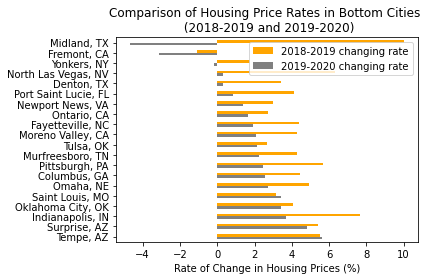

In [78]:
#plotting horizontal bar graph to compare Housing Price Rates in Bottom Cities (2018-2019 and 2019-2020)
new_bottom= new_bottom.sort_values(by='2019-2020 changing rate')
ax = new_bottom.plot.barh(color=["orange","gray"], rot=0)
ax.set_title("Comparison of Housing Price Rates in Bottom Cities \n (2018-2019 and 2019-2020)")
ax.set_xlabel("Rate of Change in Housing Prices (%)")
x_axis = np.arange(new_bottom["City, State"].nunique())
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(new_bottom["City, State"]), rotation='horizontal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Output/Q2BottomComparisonRates.png')
plt.show()


## Selected cities for analysis/trends

In [43]:
#renaming the values and columns names in the dataframe
house_df = house_df.rename(columns={"RegionName":"City"})

#finding the picked cities from the dataframe
df1 = house_df.loc[(house_df["City"]=="Boston") & (house_df["State"]=="MA")]
df2 = house_df.loc[house_df["City"]=="Salt Lake City"]
df3 = house_df.loc[(house_df["City"]=="Minneapolis") & (house_df["State"]=="MN")]
df4 = house_df.loc[house_df["City"]=="Seattle"]
df5 = house_df.loc[(house_df["City"]=="Miami") & (house_df["State"]=="FL")]
df6 = house_df.loc[(house_df["City"]=="Atlanta") & (house_df["State"]=="GA")]
df7 = house_df.loc[(house_df["City"]=="Columbus") & (house_df["State"]=="OH")]
df8 = house_df.loc[(house_df["City"]=="Columbus") & (house_df["State"]=="GA")]
df9 = house_df.loc[(house_df["City"]=="Fayetteville") & (house_df["State"]=="NC")]
df10 = house_df.loc[(house_df["City"]=="Louisville") & (house_df["State"]=="KY")]
df11 = house_df.loc[(house_df["City"]=="Portland") & (house_df["State"]=="OR")]
df12 = house_df.loc[(house_df["City"]=="San Jose") & (house_df["State"]=="CA")]
df13 = house_df.loc[house_df["City"]=="New York"]
df14 = house_df.loc[house_df["City"]=="Oklahoma City"]
df15 = house_df.loc[(house_df["City"]=="Denver") & (house_df["State"]=="CO")]
df16 = house_df.loc[(house_df["City"]=="Kansas City") & (house_df["State"]=="KS")]
df17 = house_df.loc[(house_df["City"]=="Frisco") & (house_df["State"]=="TX")]
df18 = house_df.loc[(house_df["City"]=="Irvine") & (house_df["State"]=="CA")]
df19 = house_df.loc[house_df["City"]=="Honolulu"]
df20 = house_df.loc[(house_df["City"]=="Des Moines") & (house_df["State"]=="IA")]
df21 = house_df.loc[(house_df["City"]=="Las Vegas") & (house_df["State"]=="NV")]

#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19,df20,df21]
result_df = pd.concat(frames).reset_index(drop=True)
result_df

,RegionID,SizeRank,City,RegionType,StateName,State,Metro,CountyName,1/31/96,2/29/96,...,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20
0,44269,26,Boston,City,MA,MA,Boston-Cambridge-Newton,Suffolk County,145126.0,144891.0,...,637140,638427,641871,644810,645775,645083,644869,647531,652808,659598
1,6909,150,Salt Lake City,City,UT,UT,Salt Lake City,Salt Lake County,171786.0,172028.0,...,413503,415883,417737,420016,422598,426332,429880,433189,436479,440150
2,5983,47,Minneapolis,City,MN,MN,Minneapolis-St. Paul-Bloomington,Hennepin County,88345.0,88052.0,...,285724,286744,287556,288670,290196,292148,294256,296615,299085,301333
3,16037,24,Seattle,City,WA,WA,Seattle-Tacoma-Bellevue,King County,171700.0,171851.0,...,716873,721847,725892,730218,735381,739211,745142,752713,763100,773508
4,12700,39,Miami,City,FL,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,117822.0,118015.0,...,354688,354726,356312,357509,358505,359201,359924,361230,363192,365676
5,37211,40,Atlanta,City,GA,GA,Atlanta-Sandy Springs-Roswell,Fulton County,113460.0,113758.0,...,285868,287245,289023,290562,291463,291311,292152,293351,295266,296590
6,10920,18,Columbus,City,OH,OH,Columbus,Franklin County,92070.0,92187.0,...,167254,168904,170573,171875,173030,173885,175032,176507,178527,180611
7,17539,170,Columbus,City,GA,GA,Columbus,Muscogee County,NaN,NaN,...,106093,106746,107323,107874,108403,109352,110201,111002,111448,112209
8,52001,104,Fayetteville,City,NC,NC,Fayetteville,Cumberland County,94464.0,94687.0,...,125904,126743,127196,127750,128167,128953,129956,131121,132467,133923
9,12455,19,Louisville,City,KY,KY,Louisville/Jefferson County,Jefferson County,88703.0,88984.0,...,176334,177435,178321,179348,180509,181415,182286,183450,185259,187166


In [59]:
#calcuating yearl average of house price of each city
H2018 = ['City', 'State', '1/31/18', '2/28/18', '3/31/18', '4/30/18', '5/31/18',
       '6/30/18', '7/31/18', '8/31/18', '9/30/18', '10/31/18', '11/30/18', '12/31/18']
H2018 = result_df[H2018]
H2018["2018 Average"]=H2018.mean(axis=1)

H2019 = ['City', 'State', '1/31/19', '2/28/19', '3/31/19', '4/30/19', '5/31/19',
       '6/30/19', '7/31/19', '8/31/19', '9/30/19', '10/31/19', '11/30/19', '12/31/19']
H2019 = result_df[H2019]
H2019["2019 Average"]=H2019.mean(axis=1)

H2020 = ['City', 'State','1/31/20', '2/29/20', '3/31/20', '4/30/20', '5/31/20',
       '6/30/20', '7/31/20', '8/31/20', '9/30/20']
H2020 = result_df[H2020]
H2020["2020 Average"]=H2020.mean(axis=1)

#making dataframe
Havg_df = H2018[['City', 'State']]
Havg_df["2018 Average"] = H2018["2018 Average"]
Havg_df["2019 Average"] = H2019["2019 Average"]
Havg_df["2020 Average"] = H2020["2020 Average"]
Havg_df.head()

warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')


In [60]:
#calculating yearly changing rate for each city
Hrating_df = H2018[['City', 'State']]
Hrating_df["Changing Rate 2018-2019"] = ((Havg_df["2019 Average"]- Havg_df["2018 Average"])/Havg_df["2019 Average"])*100
Hrating_df["Changing Rate 2019-2020"] = ((Havg_df["2020 Average"]- Havg_df["2019 Average"])/Havg_df["2020 Average"])*100
Hrating_df


<ipython-input-60-32b3672d0ebd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hrating_df["Changing Rate 2018-2019"] = ((Havg_df["2019 Average"]- Havg_df["2018 Average"])/Havg_df["2019 Average"])*100


,City,State,Changing Rate 2018-2019,Changing Rate 2019-2020
0,Boston,MA,2.307307,1.431722
1,Salt Lake City,UT,7.840001,5.444049
2,Minneapolis,MN,3.549732,4.026592
3,Seattle,WA,-3.802071,3.890706
4,Miami,FL,2.071225,1.695174
5,Atlanta,GA,6.082571,2.893788
6,Columbus,OH,8.179832,7.112124
7,Columbus,GA,4.425242,4.993967
8,Fayetteville,NC,4.400259,4.367598
9,Louisville,KY,3.365296,5.181740


## Bar graphs and Trend lines 

<IPython.core.display.Javascript object>


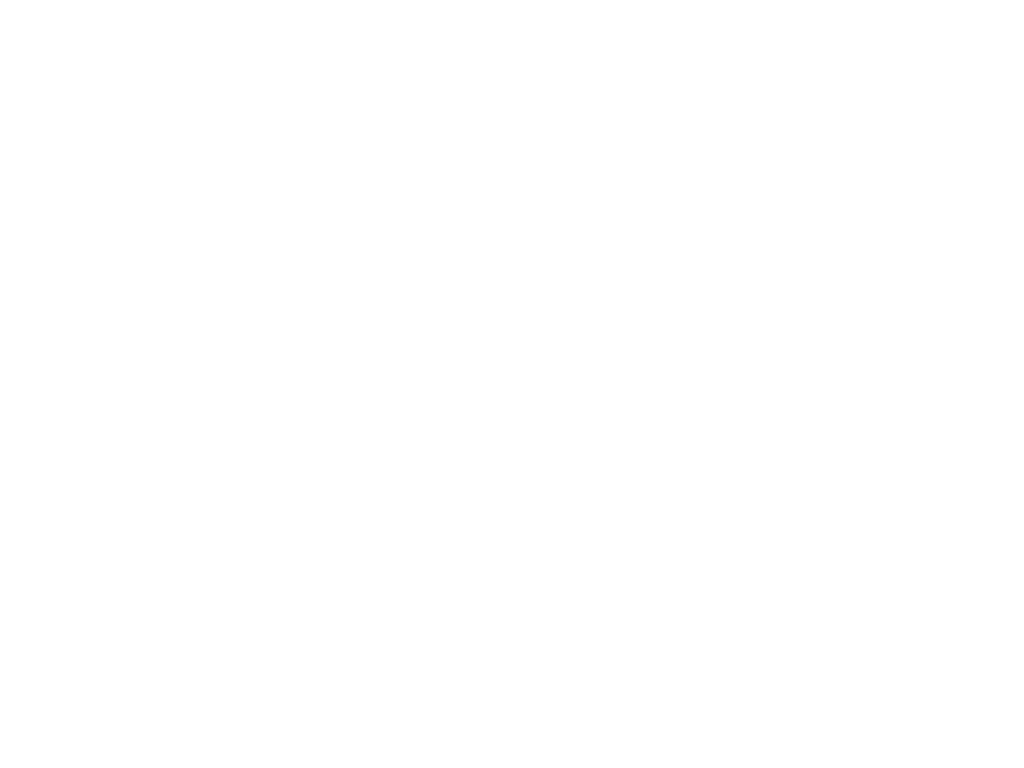

<IPython.core.display.Javascript object>


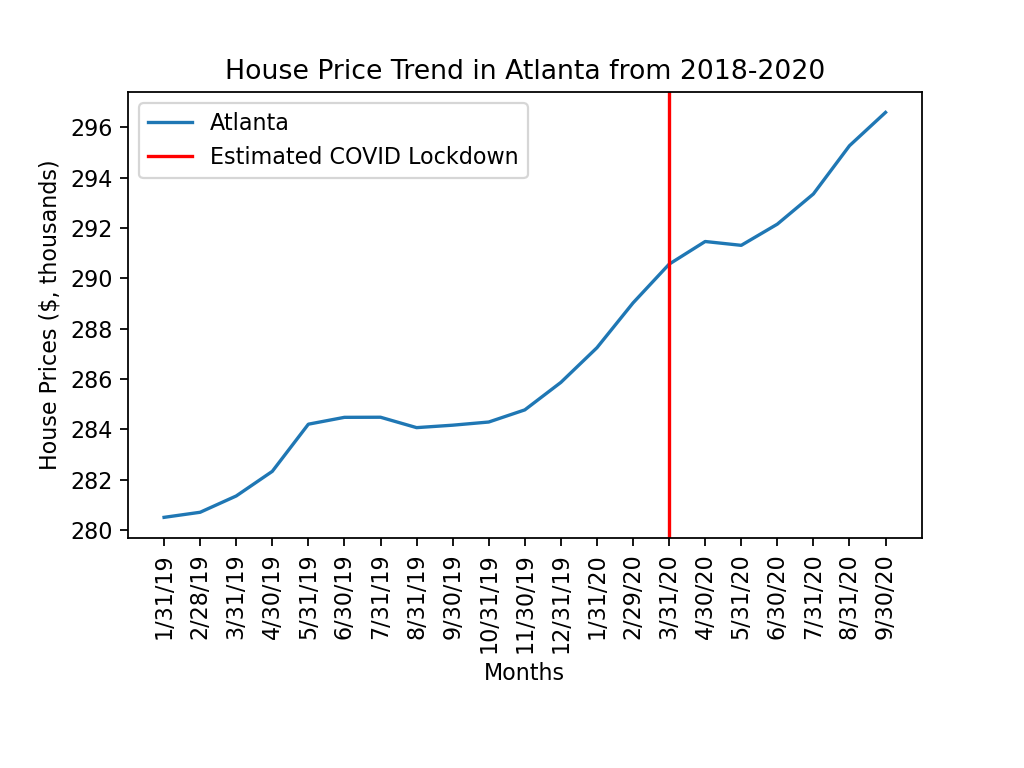

In [41]:
#ploting trendline of House Price Trend in Atlanta from 2018-2020
fig, ax=plt.subplots()
Atlanta = result_df.iloc[5,284:]
Atlanta = Atlanta/1000
%matplotlib notebook
plt.plot(Atlanta, label="Atlanta")
plt.title("House Price Trend in Atlanta from 2018-2020")
plt.xlabel("Months")
plt.ylabel("House Prices ($, thousands)")
plt.xticks(rotation = 'vertical')
plt.axvline('3/31/20', 0, 1, label='Estimated COVID Lockdown',color='r')
plt.gcf().subplots_adjust(bottom=0.3)
plt.legend()
plt.savefig('Output/Q2AtlantaOnlyTrend.png')

<IPython.core.display.Javascript object>


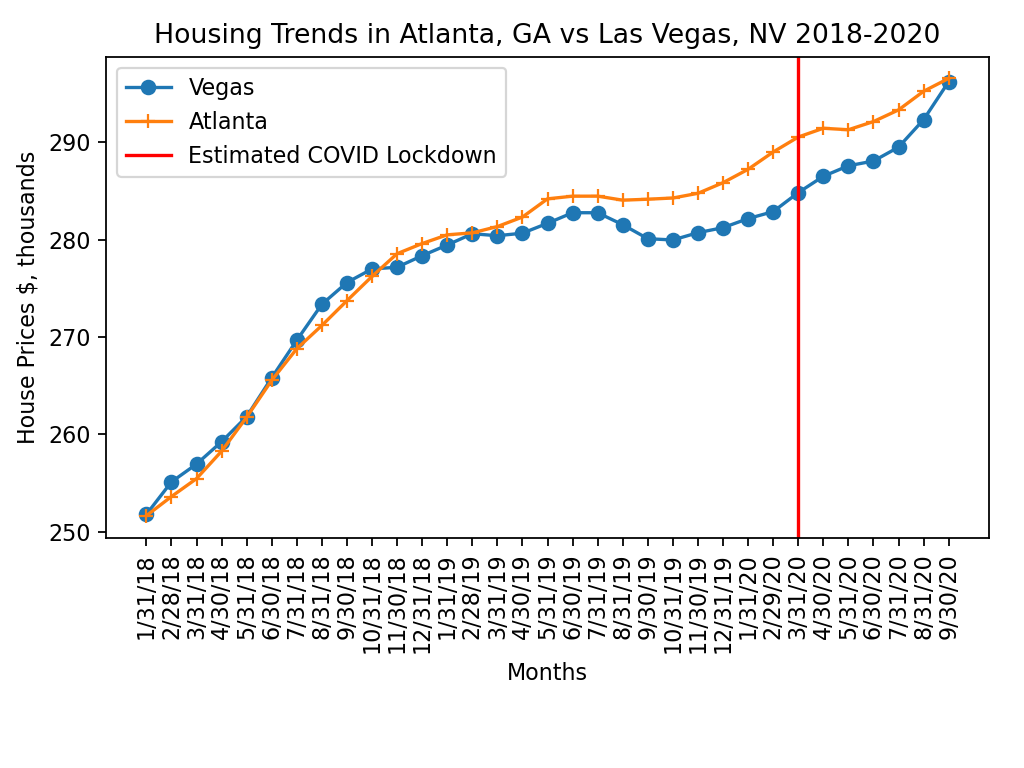

In [43]:
#Housing Trends in Atlanta, GA vs Las Vegas, NV 2018-2020
Vegas = result_df.iloc[20,272:]
Vegas = Vegas/1000
Atlanta = result_df.iloc[5,272:]
Atlanta = Atlanta/1000

%matplotlib notebook
fig, ax=plt.subplots()
plt.title("Housing Trends in Atlanta, GA vs Las Vegas, NV 2018-2020")
plt.xlabel("Months")
plt.ylabel("House Prices $, thousands")
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.plot(Vegas, label="Vegas", marker = 'o')
plt.plot(Atlanta, label="Atlanta", marker = '+')
plt.gcf().subplots_adjust(bottom=0.3)
plt.axvline('3/31/20', 0, 1, label='Estimated COVID Lockdown',color='r')
plt.legend()
plt.savefig('Output/Q2AtlantaVegasTrend.png')
plt.show()

<IPython.core.display.Javascript object>


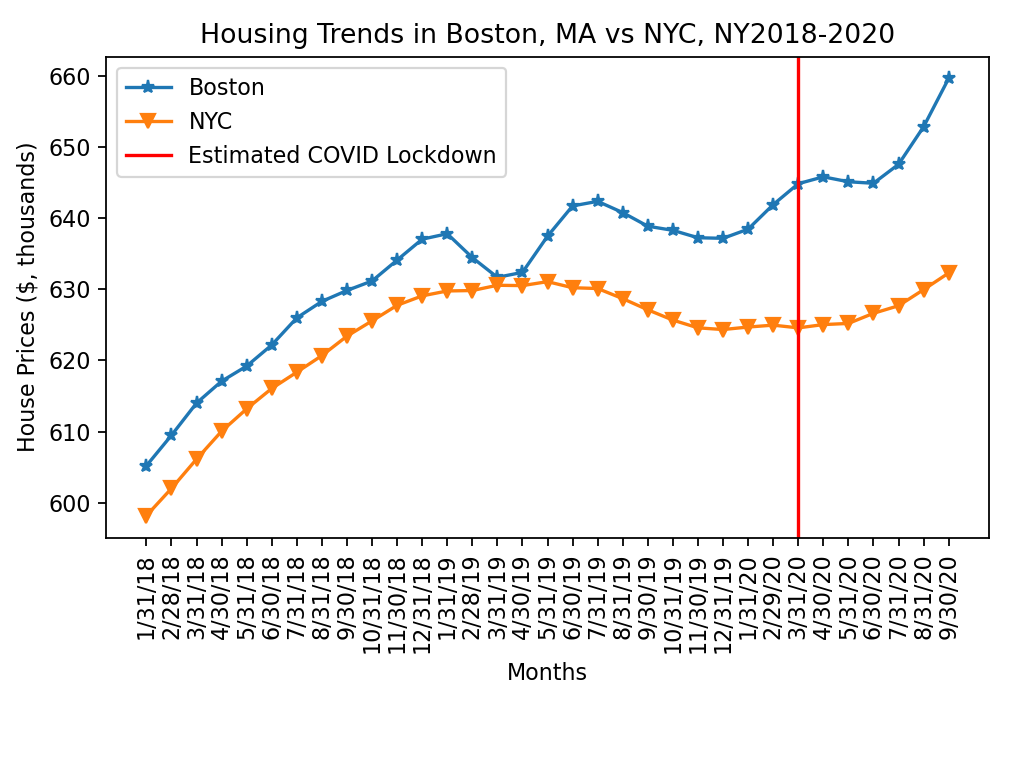

In [45]:
#Housing Trends in Atlanta, GA vs Las Vegas, NV 2018-2020
%matplotlib notebook
Boston = result_df.iloc[0,272:]
Boston = Boston/1000
NYC = result_df.iloc[12,272:]
NYC = NYC/1000
plt.title("Housing Trends in Boston, MA vs NYC, NY2018-2020")
plt.xlabel("Months")
plt.ylabel("House Prices ($, thousands)")
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.plot(Boston, label="Boston", marker = '*')
plt.plot(NYC, label="NYC", marker = 'v')
plt.axvline('3/31/20', 0, 1, label='Estimated COVID Lockdown',color='r')
plt.legend()
plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('Output/Q2BostonNYCTrend.png')